In [1]:
from SVM import SVM
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

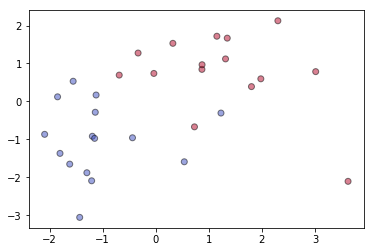

In [8]:
N = 15

X1 = np.random.multivariate_normal([1,1], [[1,0],[0,1]], N)
y1 = np.ones(N)
X2 = np.random.multivariate_normal([-1,-1], [[1,0],[0,1]], N)
y2 = np.ones(N) * -1

X = np.concatenate([X1, X2])
y = np.concatenate([y1, y2])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, alpha=0.5, edgecolors='k')
plt.show()

In [3]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

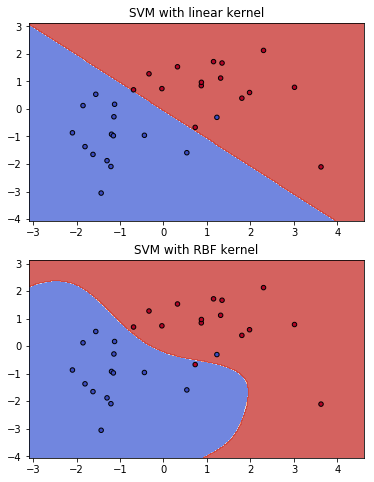

In [10]:
models = [SVM(kernel='linear'), SVM(kernel='rbf', sigma=1)]
for clf in models:
    clf.fit(X, y)
    
fig, sub = plt.subplots(2, 1, figsize=[6, 8])
titles = ('SVM with linear kernel',
          'SVM with RBF kernel')

for clf, title, ax in zip(models, titles, sub.flatten()):
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

plt.show()